In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [63]:
PATH="../InterCalibrazione - Foglio1.csv"  #importo il file con la calibrazione
data=pd.read_csv(PATH, sep=';', decimal='.')
display(data)
Ch=np.array(data["ch"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err stat"])      #errori stocastici sulla posizione dei picchi
peak_err_sist=np.array(data["err_sist"])
peak_err=np.sqrt(peak_err_stat**2 + (0.34*peak_err_sist)**2)


,ch,val,err stat,err_sist
0,0,-313.642,0.099,1.0
1,1,-310.580,0.450,1.0
2,2,-388.970,0.140,1.0
3,3,-321.630,0.450,1.0
4,4,-311.860,0.400,1.0
5,5,-313.800,0.110,1.0
6,6,-279.370,0.280,1.0
7,7,-376.445,0.076,1.0
8,8,-331.630,0.450,1.0
9,9,-362.250,0.094,1.0


In [64]:
channel_ref=7

In [65]:
coeff_cal=peak_centers/peak_centers[channel_ref]
coeff_err=peak_err/peak_centers[channel_ref]
coeff_err[channel_ref]=0
print(coeff_cal)
print(coeff_err)

[0.83316819 0.8250342  1.03327179 0.85438776 0.82843443 0.83358791
 0.742127   1.         0.88095206 0.96229197 1.03388277 0.79339611
        nan        nan 0.77262283 0.85550346]
[-0.0009407  -0.00149824 -0.00097676 -0.00149824 -0.00139456 -0.00094928
 -0.00117004  0.         -0.00149824 -0.00093707 -0.00094928 -0.00100979
         nan         nan -0.00115333 -0.00129622]


In [66]:
list=[0,1,2,3,4,5,6,7,8,9,10,11,14,15]
train_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(train_peak_centers)
train_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(train_peak_centers)
print(train_peak_errors)


[-376.445 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445
 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445]
[-376.445 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445
 -376.445 -376.445 -376.445 -376.445 -376.445 -376.445]
[0.60108075 0.96677382 0.50325578 0.9335591  0.89618251 0.60626017
 0.83933943 0.34839059 0.90540847 0.5184193  0.48880895 0.67757731
 0.79469987 0.80662732]


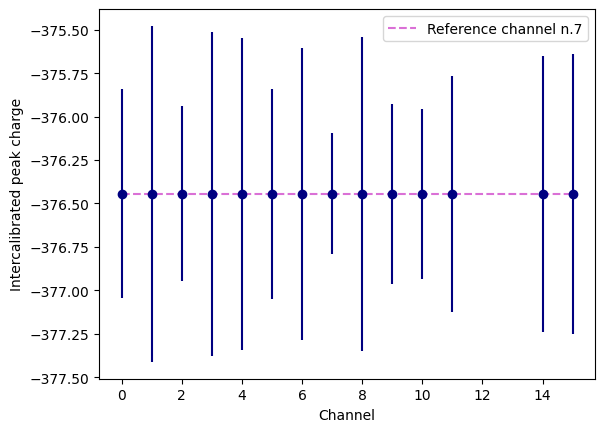

In [67]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()

##  Test

In [61]:
PATH="../Test_intercalibrazione - Foglio1.csv"  #importo il file con i nuovi picchi da verificare
data=pd.read_csv(PATH, sep=';', decimal='.')
display(data)
Ch=np.array(data["ch"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err stat"])      #errori stocastici sulla posizione dei picchi
peak_err_sist=np.array(data["err_sist"])
peak_err=np.sqrt(peak_err_stat**2 + peak_err_sist**2)


###########################################################################
test_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(test_peak_errors)


FileNotFoundError: [Errno 2] No such file or directory: '../Test_intercalibrazione - Foglio1.csv'

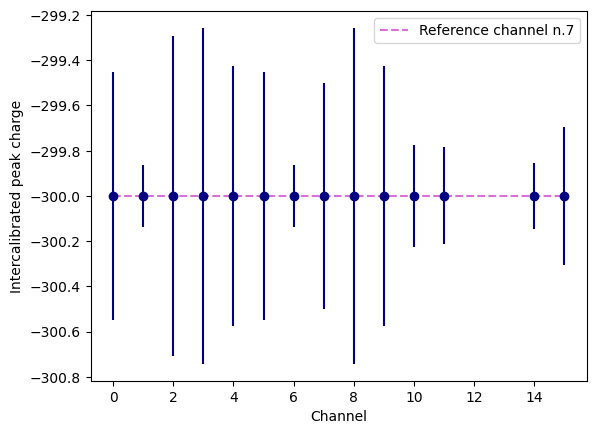

In [51]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    